In [355]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams  ## run command settings for plotting


In [356]:
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号，大家自行调节
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)  ## 设置画图的一些参数

In [357]:
## 读取数据
path = 'D:/tx/regress_data1.csv'
import pandas as pd
data = pd.read_csv(path) ## data 是dataframe 的数据类型
data.head() # 返回data中的前几行数据，默认是前5行。

,人口,收益
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [358]:
cols = data.shape[1]
X_data = data.iloc[:,:cols-1]#X是所有行，去掉最后一列， 未标准化
y_data = data.iloc[:,cols-1:]#X是所有行，最后一列

In [359]:
data.describe() ## 查看数据的统计信息

,人口,收益
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


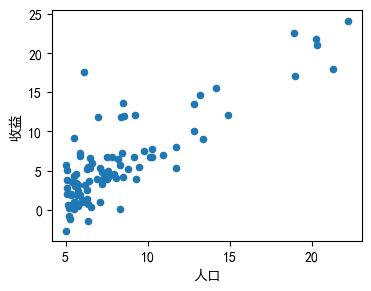

In [360]:
data.plot(kind='scatter', x='人口', y='收益', figsize=(4,3)) # 利用散点图可视化数据
import matplotlib
plt.xlabel('人口')
plt.ylabel('收益', rotation=90)
plt.show()

In [361]:
X_data.insert(0, 'Ones', 1)

In [362]:
X_data.head()#head()是观察前5行

,Ones,人口
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [363]:
y_data.head()

,收益
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [364]:
X=X_data.values
Y=y_data.values
W=np.array([[0.0],[0.0]]) ## 初始化W系数矩阵，w 是一个(2,1)矩阵

In [365]:
(X.shape,Y.shape, W.shape)#维度

((97, 2), (97, 1), (2, 1))

In [366]:
def computeCost(X, Y, W, lambda_):
    m = X.shape[0]
    Y_hat = np.dot(X, W)
    loss = np.sum((Y_hat - Y) ** 2) / (2 * m)
    regularization_term = (lambda_ / (2 * m)) * np.sum(W ** 2)
    return loss + regularization_term

In [367]:
def gradientDescent(X, Y, W, alpha, lambda_):
    m = X.shape[0]
    Y_hat = np.dot(X, W)
    dW = (1 / m) * np.dot(X.T, (Y_hat - Y)) + (lambda_ / m) * W
    W -= alpha * dW
    return W

In [368]:
def linearRegression(X, Y, alpha, iters, lambda_):
    loss_his = []
    feature_dim = X.shape[1]
    W = np.zeros((feature_dim, 1))
    
    for i in range(iters):
        loss = computeCost(X, Y, W, lambda_)
        loss_his.append(loss)
        W = gradientDescent(X, Y, W, alpha, lambda_)
    
    return loss_his, W

In [369]:
def predict(X, W):
    '''
    输入：
        X：测试数据集
        W：模型训练好的参数
    输出：
        y_pre：预测值
    '''
    y_pre = np.dot(X,W)
    return y_pre

In [370]:
alpha =0.0001
iters = 10000
lambda_=10 #参数可取0.1 1 10 100  观察10较佳
loss_his, W = linearRegression(X,Y, alpha, iters,lambda_)

In [371]:
W

array([[-0.54441911],
       [ 0.85534913]])

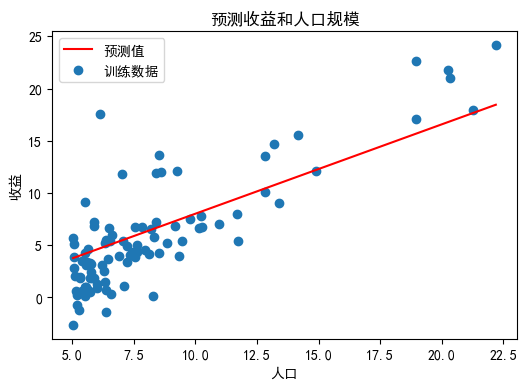

In [372]:
x = np.linspace(X_data['人口'].min(), X_data['人口'].max(), 100)
f = W[0, 0] + (W[1, 0] * x)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(X_data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2)
ax.set_xlabel('人口' )
ax.set_ylabel('收益', rotation=90)
ax.set_title('预测收益和人口规模')
plt.show()

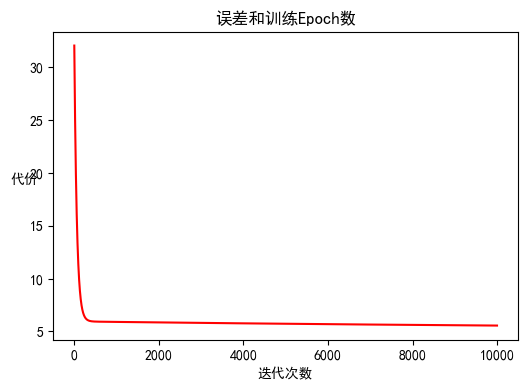

In [373]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(iters), loss_his, 'r')
ax.set_xlabel('迭代次数')
ax.set_ylabel('代价', rotation=0)
ax.set_title('误差和训练Epoch数')
plt.show()